In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb = pd.read_csv('imdb_sentiment.csv')
imdb['review'].head()

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
Name: review, dtype: object

In [3]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
imdb.review.str.split(expand=True).stack().value_counts()[0:5]

the    655
a      411
and    410
of     368
is     323
dtype: int64

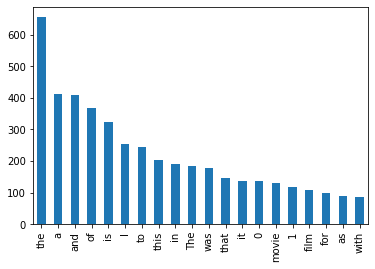

In [5]:
imdb.review.str.split(expand=True).stack().value_counts()[0:20].plot(kind='bar')

In [6]:
review_merge = ''.join(imdb.review.values)
review_merge[:100]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  Not sure who '

In [7]:
from wordcloud import WordCloud

In [8]:
word_cloud = WordCloud().generate(review_merge)

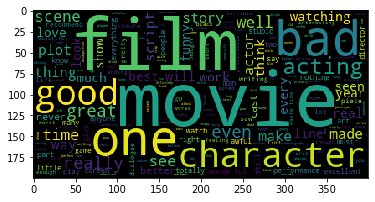

In [9]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [10]:
x = imdb['review'].head()
for i in x:
    
    results = set()
    imdb['review'].str.lower().str.split().apply(results.update)
    print (results)

{'try', 'funniest', 'things.', 'try.', 'world,', 'rated', 'swamp', 'movie.', 'started', 'itself.', 'suspension', 'editing', 'suspense', 'attempted', 'females', 'meanings.', 'tv', 'draft', 'genius.', 'modern', 'where', 'excerpts', 'is', 'lets', 'era', 'movies"', 'used', 'holes!', 'photography/cinematography', 'average', 'funny', 'else.', 'situation,', 'way', 'admitted', 'went', 'unlockable', 'vampire', 'dumb', 'character', 'weak', 'ever!,', 'charles.', 'unrecognizable', 'foxx', 'juano', 'salesman', 'scary.', 'reasons', 'fame.', 'by', '...', 'settings', 'monolog', 'hosting;', 'fantastic', 'within', 'terrible', 'on"', 'bennett,', 'them.', 'masterpieces,', 'vomited', 'towards', 'local', 'abysmal!', 'educational', 'faultless', 'follow', "today's", 'also,', 'complete', 'widmark', 'depending', 'was,', 'interpretations', 'natural,', 'guess', 'badly.', 'regrettably,', 'seperate', 'comforting', 'adrift', 'hilarious', 'free', 'beyond', 'ed', 'trouble', 'spiffy,', 'trumbull', 'forget', 'sum', 'aes

In [11]:
y = imdb.review.str.split(expand=True).stack().value_counts().reset_index()
words =y['index']
freq =y[0]

In [12]:
print(words[:10])

0     the
1       a
2     and
3      of
4      is
5       I
6      to
7    this
8      in
9     The
Name: index, dtype: object


In [13]:
word_cloud = WordCloud(width=880, height=800,background_color='white', max_words=150).\
generate_from_text(review_merge)

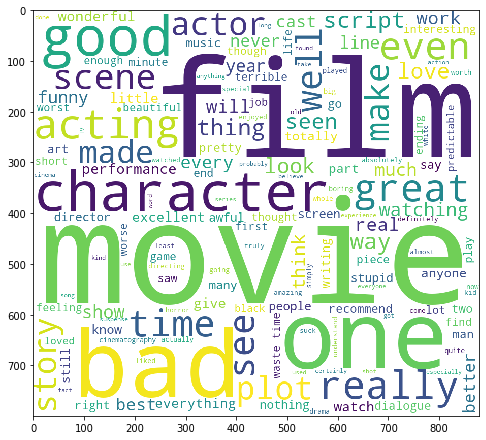

In [14]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

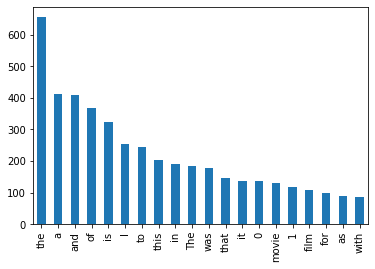

In [15]:
imdb.review.str.split(expand=True).stack().value_counts()[:20].plot(kind='bar')

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
all_terms = word_tokenize(review_merge.lower())

In [18]:
print(all_terms[:20])

['a', 'very', ',', 'very', ',', 'very', 'slow-moving', ',', 'aimless', 'movie', 'about', 'a', 'distressed', ',', 'drifting', 'young', 'man', '.', 'not', 'sure']


In [19]:
from nltk.probability import FreqDist

In [20]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 902, 'the': 845, ',': 649, 'and': 433, 'a': 431, 'of': 375, 'is': 343, 'it': 322, 'i': 298, 'this': 292, ...})

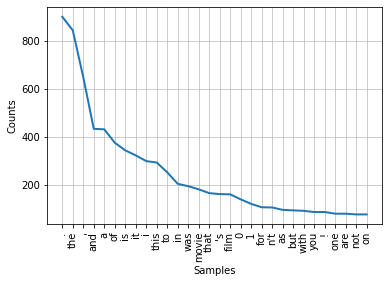

In [21]:
fdist.plot(30, cumulative=False)
plt.show()

#### StopWords

In [22]:
from string import punctuation
from nltk.corpus import stopwords

In [23]:
stop_nltk = stopwords.words('english')

In [24]:
stop_updated = stop_nltk+ ["...","..","!!"]+['film','movie','one','charecter','great','really',"n't"]

In [25]:
reviews_updated1 = [term for term in all_terms if term not in stop_updated and term not in list(punctuation) and len(term)>2]

In [26]:
print(reviews_updated1[:100])

['slow-moving', 'aimless', 'distressed', 'drifting', 'young', 'man', 'sure', 'lost', 'flat', 'characters', 'audience', 'nearly', 'half', 'walked', 'attempting', 'artiness', 'black', 'white', 'clever', 'camera', 'angles', 'disappointed', 'became', 'even', 'ridiculous', 'acting', 'poor', 'plot', 'lines', 'almost', 'non-existent', 'little', 'music', 'anything', 'speak', 'best', 'scene', 'gerardo', 'trying', 'find', 'song', 'keeps', 'running', 'head', 'rest', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty', 'wasted', 'two', 'hours', 'saw', 'today', 'thought', 'good', 'effort', 'good', 'messages', 'kids', 'bit', 'predictable', 'loved', 'casting', 'jimmy', 'buffet', 'science', 'teacher', 'baby', 'owls', 'adorable', 'showed', 'lot', 'florida', 'best', 'made', 'look', 'appealing', 'songs', 'best', 'muppets', 'hilarious', 'cool', 'right', 'case', 'delivers', 'everything', 'almost', 'right', 'face', 'average', 'acting', 'main', 'person', 'low', 'budget']


In [27]:
from nltk.stem import PorterStemmer, SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [28]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens if term not in stop_updated and term not in list(punctuation) and len(term)>2]
    res = " ".join(stemmed)
    return res

In [29]:
imdb['clean_review'] = imdb.review.apply(clean_txt)

In [30]:
imdb['clean_review'].head()

0            slow-mov aimless distress drift young man
1        sure lost flat charact audienc near half walk
2    attempt arti black white clever camera angl di...
3                              littl music anyth speak
4       best scene gerardo tri find song keep run head
Name: clean_review, dtype: object

In [31]:
imdb.clean_review.str.split(expand=True).stack().value_counts().nunique()

41

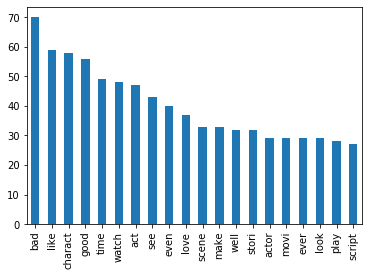

In [32]:
imdb.clean_review.str.split(expand=True).stack().value_counts()[:20].plot(kind='bar')